In [74]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, cohen_kappa_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv(r"D:\GreatLakes\Capstone_project\alzheimers_disease_data.csv")

In [3]:
# Checking the head of data
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

### Checking for missing values

In [5]:
df.isnull().sum()
# no null values found

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

### Checking for duplicate values

In [6]:
df[df.duplicated()]
# No duplicate entries found

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge


### Checking the correlation among variables

In [7]:
df.corr(numeric_only=True)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,1.000000,0.002947,-0.043665,-0.007608,-0.001729,-0.034228,0.021907,-0.020733,-0.011424,-0.018490,...,0.025033,0.005748,-0.033700,-0.019787,0.004430,0.010772,-0.011987,0.029727,0.001448,0.041019
Age,0.002947,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,-0.043665,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,-0.007608,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.001729,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.034228,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.021907,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,-0.020733,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.011424,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.018490,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506


### Checking the 5 point summary

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [9]:
df['DoctorInCharge'].value_counts()
# Since we have only single unique value in this column making it redundant, hence dropping it won't affect the model performance

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [10]:
df.drop('DoctorInCharge', axis=1, inplace=True)

In [11]:
# PatientID have all unique ID's, hence making it as index of the dataset
df.set_index('PatientID', inplace=True)

In [12]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


### Univariate Analysis

In [13]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [14]:
cat_cols = ['Gender', 'Ethnicity', 'EducationLevel','Smoking','FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension','MemoryComplaints', 'BehavioralProblems','Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness']

In [15]:
num_cols = ['Age','BMI','AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment','ADL']

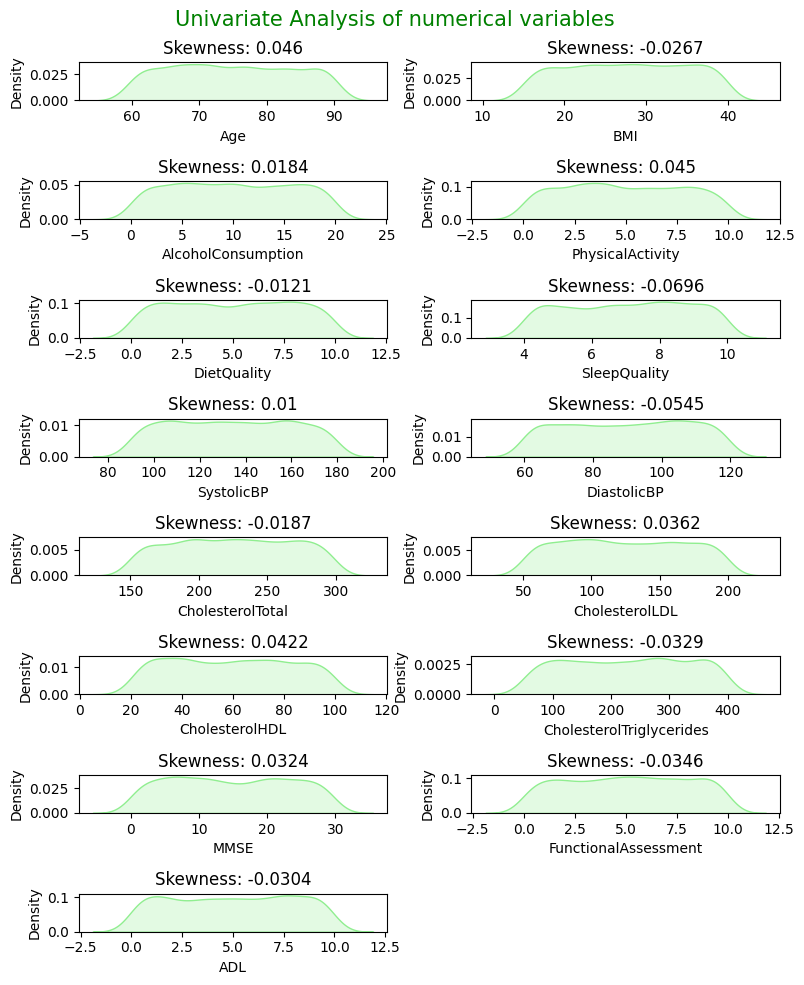

In [16]:
# Univariate Analysis of numerical variables
t = 1
plt.figure(figsize=(8,10))
plt.suptitle('Univariate Analysis of numerical variables', color = 'Green', size = 15)
for i in num_cols:
    s = df[i].skew()
    plt.subplot(8,2,t)
    sns.kdeplot(df, x =i, fill =True, color = 'Lightgreen')
    plt.title(f'Skewness: {round(s,4)}')
    t = t+1
plt.tight_layout()
plt.show()

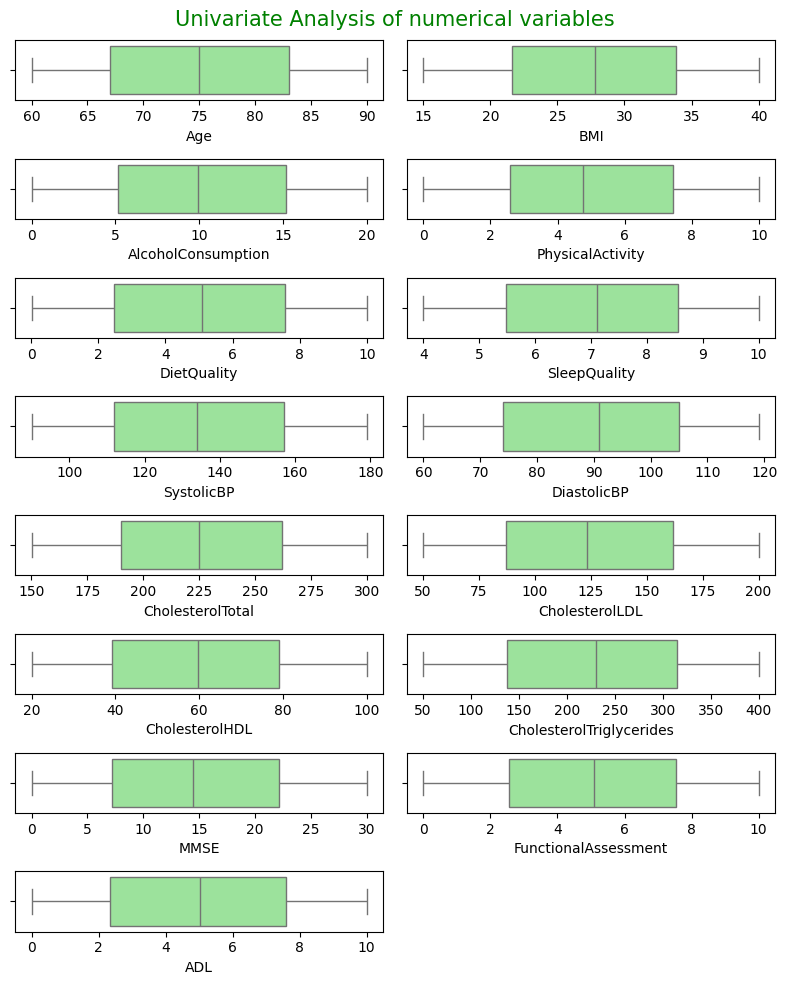

In [17]:
t = 1
plt.figure(figsize=(8,10))
plt.suptitle('Univariate Analysis of numerical variables', color = 'Green', size = 15)
for i in num_cols:
    plt.subplot(8,2,t)
    sns.boxplot(df, x =i, color = 'Lightgreen')
    t = t+1
plt.tight_layout()
plt.show()

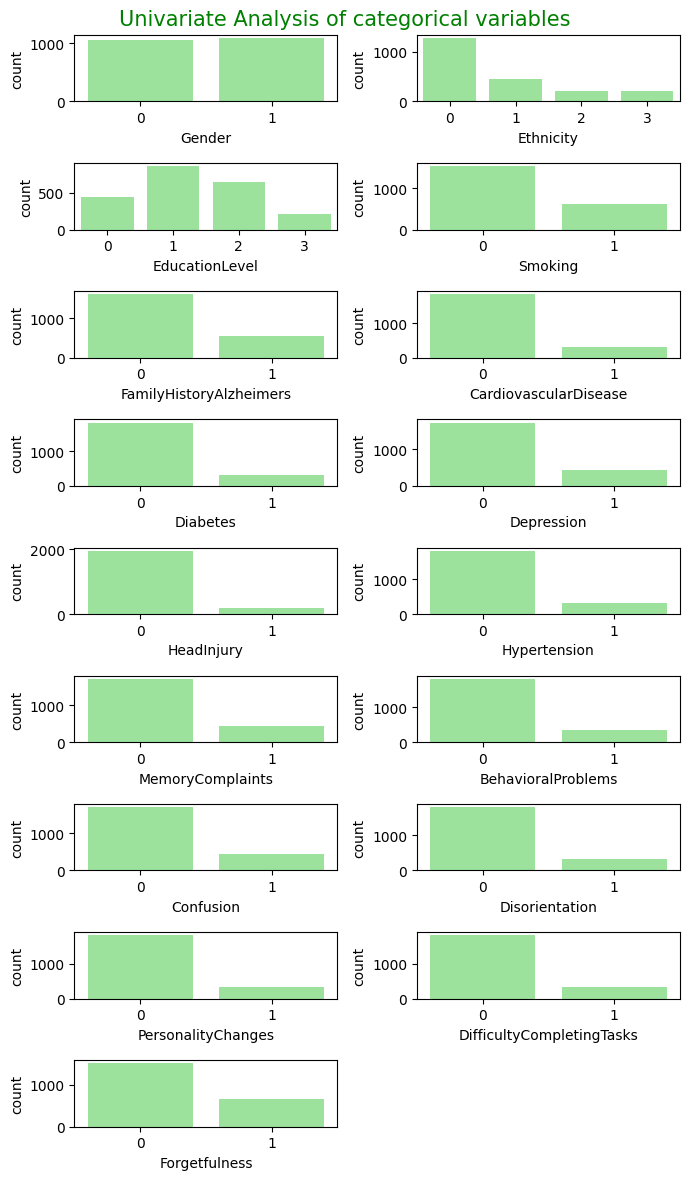

In [18]:
# Univariate Analysis of categorical variables
t = 1
plt.figure(figsize=(7,12))
plt.suptitle('Univariate Analysis of categorical variables', color = 'Green', size = 15)
for i in cat_cols:
    plt.subplot(9,2,t)
    sns.countplot(df, x =i, color = 'Lightgreen')
    t = t+1
plt.tight_layout()
plt.show()

### Bivariate  Analysis

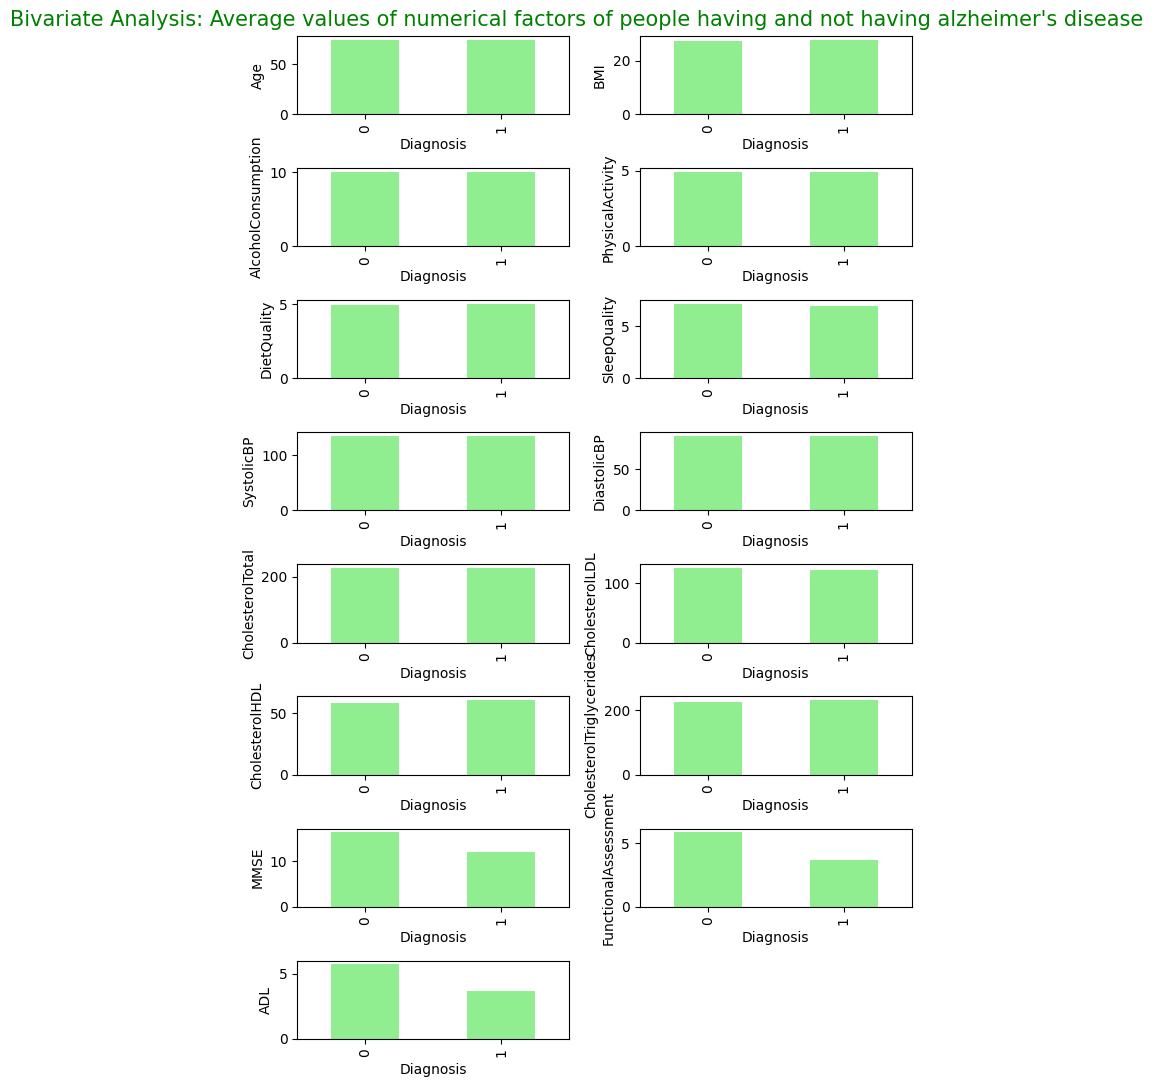

In [94]:
t = 1
plt.figure(figsize=(7,12))
plt.suptitle("Bivariate Analysis: Average values of numerical factors of people having and not having alzheimer's disease", color = 'Green', size = 15)
for i in  num_cols:
    plt.subplot(9,2,t)
    df.groupby('Diagnosis')[i].mean().plot(kind = 'bar', color = 'Lightgreen')
    plt.ylabel(i)
    t = t+1
plt.tight_layout()
plt.show()

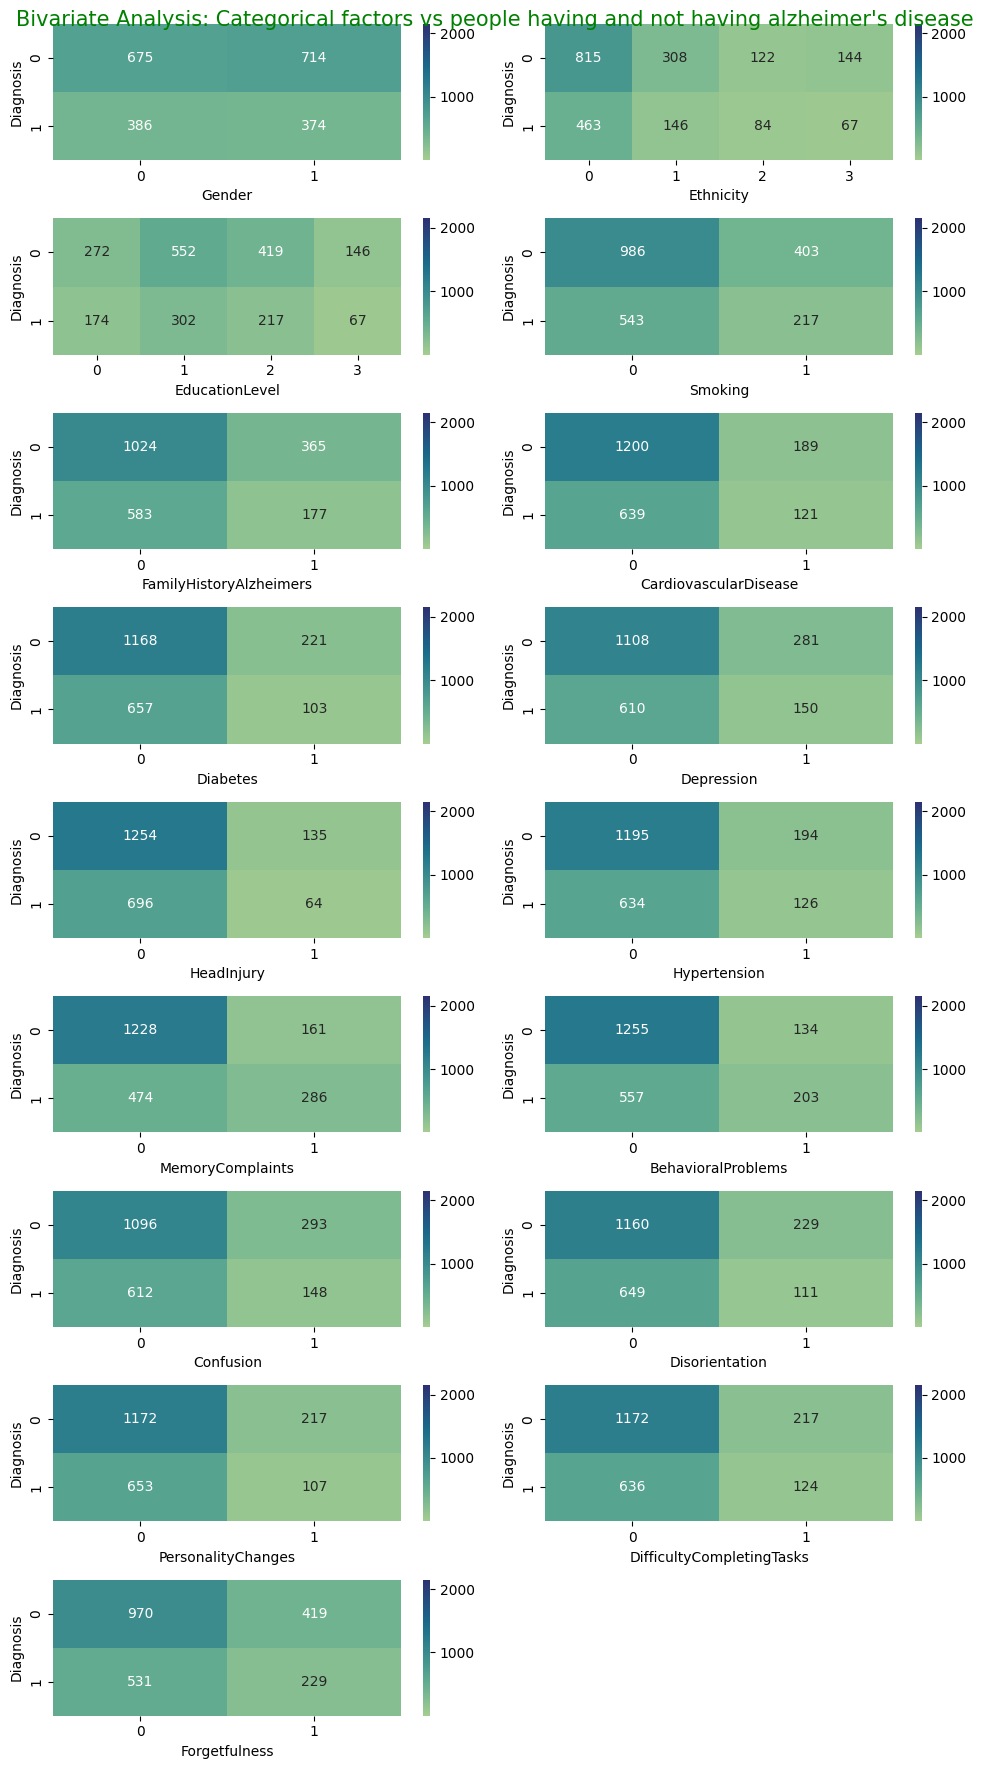

In [93]:
t = 1
plt.figure(figsize=(10,18))
plt.suptitle("Bivariate Analysis: Categorical factors vs people having and not having alzheimer's disease", color = 'Green', size = 15)
for i in  cat_cols:
    plt.subplot(9,2,t)
    sns.heatmap(pd.crosstab(index = df['Diagnosis'], columns = df[i]), annot= True, vmin=1, vmax =2149,cmap = 'crest',fmt="d" )
    t = t+1
plt.tight_layout()
plt.show()

### Checking the dependent variable

In [21]:
df['Diagnosis'].value_counts(normalize=True)

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64

### Hypothesis Testing

### Checking numerical attributes with target variable

In [22]:
results = {}
for i in num_cols:
    test_stats, p_value = stats.ttest_ind(df.loc[df['Diagnosis']==0,i], df.loc[df['Diagnosis']==1,i], alternative='two-sided')
    results.update({i : round(p_value,4)})

In [23]:
results

{'Age': 0.7993,
 'BMI': 0.2222,
 'AlcoholConsumption': 0.7241,
 'PhysicalActivity': 0.783,
 'DietQuality': 0.6935,
 'SleepQuality': 0.0087,
 'SystolicBP': 0.4694,
 'DiastolicBP': 0.8063,
 'CholesterolTotal': 0.767,
 'CholesterolLDL': 0.1384,
 'CholesterolHDL': 0.0484,
 'CholesterolTriglycerides': 0.2935,
 'MMSE': 0.0,
 'FunctionalAssessment': 0.0,
 'ADL': 0.0}

### Checking categorical attributes with target variable

In [24]:
cat_cols

['Gender',
 'Ethnicity',
 'EducationLevel',
 'Smoking',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'MemoryComplaints',
 'BehavioralProblems',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness']

In [25]:
df1 = pd.crosstab(index = df['Diagnosis'], columns = df['Gender'])
p_value = stats.chi2_contingency(df1)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [26]:
df2 = pd.crosstab(index = df['Diagnosis'], columns = df['Ethnicity'])
p_value = stats.chi2_contingency(df2)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [27]:
df3 = pd.crosstab(index = df['Diagnosis'], columns = df['EducationLevel'])
p_value = stats.chi2_contingency(df3)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [28]:
df4 = pd.crosstab(index = df['Diagnosis'], columns = df['Smoking'])
p_value = stats.chi2_contingency(df4)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [29]:
df5 = pd.crosstab(index = df['Diagnosis'], columns = df['FamilyHistoryAlzheimers'])
p_value = stats.chi2_contingency(df5)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [30]:
df6 = pd.crosstab(index = df['Diagnosis'], columns = df['CardiovascularDisease'])
p_value = stats.chi2_contingency(df6)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [31]:
df7 = pd.crosstab(index = df['Diagnosis'], columns = df['Diabetes'])
p_value = stats.chi2_contingency(df7)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [32]:
df8 = pd.crosstab(index = df['Diagnosis'], columns = df['Depression'])
p_value = stats.chi2_contingency(df8)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [33]:
df9 = pd.crosstab(index = df['Diagnosis'], columns = df['HeadInjury'])
p_value = stats.chi2_contingency(df9)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [34]:
df10 = pd.crosstab(index = df['Diagnosis'], columns = df['Hypertension'])
p_value = stats.chi2_contingency(df10)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [35]:
df11 = pd.crosstab(index = df['Diagnosis'], columns = df['MemoryComplaints'])
p_value = stats.chi2_contingency(df11)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is significant


In [36]:
df12 = pd.crosstab(index = df['Diagnosis'], columns = df['BehavioralProblems'])
p_value = stats.chi2_contingency(df12)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is significant


In [37]:
df13 = pd.crosstab(index = df['Diagnosis'], columns = df['Confusion'])
p_value = stats.chi2_contingency(df13)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [38]:
df14 = pd.crosstab(index = df['Diagnosis'], columns = df['Disorientation'])
p_value = stats.chi2_contingency(df14)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [39]:
df15 = pd.crosstab(index = df['Diagnosis'], columns = df['PersonalityChanges'])
p_value = stats.chi2_contingency(df15)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [40]:
df16 = pd.crosstab(index = df['Diagnosis'], columns = df['DifficultyCompletingTasks'])
p_value = stats.chi2_contingency(df16)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


In [41]:
df17 = pd.crosstab(index = df['Diagnosis'], columns = df['Forgetfulness'])
p_value = stats.chi2_contingency(df17)[1]
if p_value>0.05:
    print('Attribute is not significant')
else:
    print('Attribute is significant')

Attribute is not significant


### Factors found significant

In [43]:
sig_cols = ['SleepQuality','CholesterolHDL','MMSE', 'FunctionalAssessment','ADL', 'MemoryComplaints','BehavioralProblems']

In [47]:
dfm = df[sig_cols]

In [49]:
dfm['Diagnosis'] = df['Diagnosis']

In [50]:
dfm

,SleepQuality,CholesterolHDL,MMSE,FunctionalAssessment,ADL,MemoryComplaints,BehavioralProblems,Diagnosis
PatientID,,,,,,,,
4751,9.025679,33.682563,21.463532,6.518877,1.725883,0,0,0
4752,7.151293,79.028477,20.613267,7.118696,2.592424,0,0,0
4753,9.673574,69.772292,7.356249,5.895077,7.119548,0,0,0
4754,8.392554,68.457491,13.991127,8.965106,6.481226,0,1,0
4755,5.597238,56.874305,13.517609,6.045039,0.014691,0,0,0
...,...,...,...,...,...,...,...,...
6895,7.535540,60.943092,1.201190,0.238667,4.492838,0,0,1
6896,8.555256,93.649735,6.458060,8.687480,9.204952,0,1,1
6897,5.769464,99.678209,17.011003,1.972137,5.036334,0,0,1


### Train_test_split

In [53]:
x = dfm.drop('Diagnosis', axis =1)
y = dfm['Diagnosis']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.7, stratify=y)

In [55]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1504, 7) (645, 7) (1504,) (645,)


In [58]:
y_train.value_counts()

Diagnosis
0    972
1    532
Name: count, dtype: int64

In [63]:
# Balancing the target variable using SMOTE
sm = SMOTE(sampling_strategy=0.75)
x_train_s, y_train_s = sm.fit_resample(x_train,y_train)

In [64]:
y_train_s.value_counts(normalize=True)

Diagnosis
0    0.571429
1    0.428571
Name: proportion, dtype: float64

### Modelling

### Logistic Regression
* For base Model

In [66]:
lr = LogisticRegression()
model_lr = lr.fit(x_train_s,y_train_s)

In [67]:
y_preds_lr = model_lr.predict_proba(x_test)[:,1]
y_predh_lr = (y_preds_lr>0.5).as_integer_ratiotype(int)

In [72]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predh_lr))
print(classification_report(y_test, y_predh_lr))
print(f'Cohen kappa score: {cohen_kappa_score(y_test, y_predh_lr)}')

Confusion Matrix
[[350  67]
 [ 41 187]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       417
           1       0.74      0.82      0.78       228

    accuracy                           0.83       645
   macro avg       0.82      0.83      0.82       645
weighted avg       0.84      0.83      0.83       645

Cohen kappa score: 0.6428900987358125


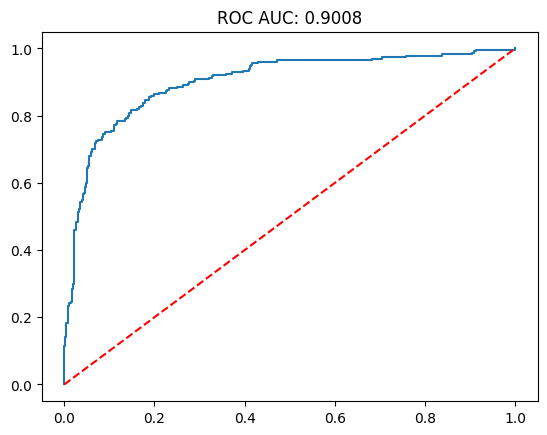

In [73]:
fpr, tpr, thresh = roc_curve(y_test, y_preds_lr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], ls='--', color = 'red')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_lr),4)}')
plt.show()

### Decision Tree Classifier using GridSearchCV

In [78]:
grid = {'max_depth': [4,5,6], 'min_samples_split':[8,9,10]}
gscv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5, scoring='roc_auc')
model_cv = gscv.fit(x_train_s,y_train_s)

In [79]:
model_cv.best_params_

{'max_depth': 5, 'min_samples_split': 8}

In [81]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=8)
model_dt = dt.fit(x_train_s,y_train_s)

In [82]:
y_preds_dt = model_dt.predict_proba(x_test)[:,1]
y_predh_dt = (y_preds_dt>0.5).astype(int)

In [83]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predh_dt))
print(classification_report(y_test, y_predh_dt))
print(f'Cohen kappa score: {cohen_kappa_score(y_test, y_predh_dt)}')

Confusion Matrix
[[399  18]
 [ 19 209]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       417
           1       0.92      0.92      0.92       228

    accuracy                           0.94       645
   macro avg       0.94      0.94      0.94       645
weighted avg       0.94      0.94      0.94       645

Cohen kappa score: 0.8743702721056206


Text(0.5, 1.0, 'roc_auc_score : 0.9368')

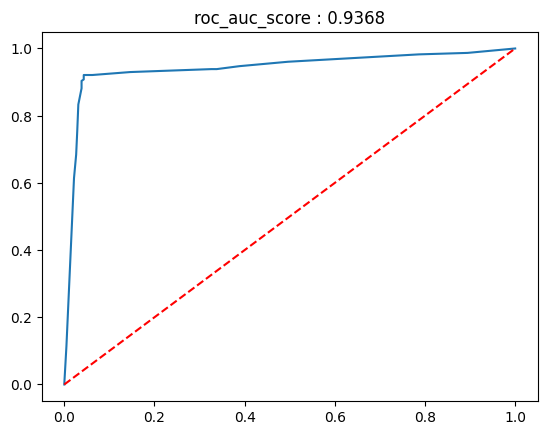

In [86]:
fpr, tpr,thres = roc_curve(y_test, y_preds_dt)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color = 'red', ls = '--')
plt.title(f'roc_auc_score : {round(roc_auc_score(y_test, y_predh_dt),4)}')

### XGBoost Classifier using GridSearchCV

In [87]:
grid1 = {'max_depth':[5,6], 'learning_rate':[0.1,0.2], 'gamma': [0.1,0.2,0.3]}
gscv1 = GridSearchCV(estimator=XGBClassifier(n_estimators=100), param_grid=grid1, cv=5, scoring='roc_auc')
model_cv1 = gscv1.fit(x_train_s, y_train_s)

In [88]:
model_cv1.best_params_

{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5}

In [89]:
xgb = XGBClassifier(n_estimators = 100, max_depth=5, learning_rate = 0.1, gamma = 0.2)
model_xgb = xgb.fit(x_train_s, y_train_s)

In [90]:
y_preds_xgb = model_xgb.predict_proba(x_test)[:,1]
y_predh_xgb = (y_preds_xgb>0.5).astype(int)

In [91]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predh_xgb))
print(classification_report(y_test, y_predh_xgb))
print(f'Cohen kappa score: {cohen_kappa_score(y_test, y_predh_xgb)}')

Confusion Matrix
[[403  14]
 [ 21 207]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       417
           1       0.94      0.91      0.92       228

    accuracy                           0.95       645
   macro avg       0.94      0.94      0.94       645
weighted avg       0.95      0.95      0.95       645

Cohen kappa score: 0.8804473889074241


Text(0.5, 1.0, 'roc_auc_score : 0.9372')

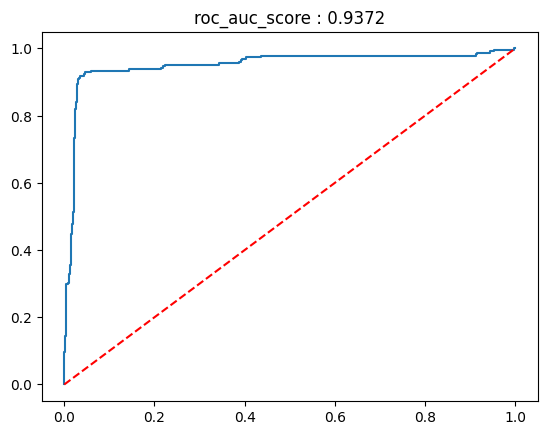

In [92]:
fpr, tpr,thres = roc_curve(y_test, y_preds_xgb)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color = 'red', ls = '--')
plt.title(f'roc_auc_score : {round(roc_auc_score(y_test, y_predh_xgb),4)}')